In [118]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = load_digits()

data.keys()





dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [119]:
df = pd.DataFrame(data.data,columns = data.feature_names)

df['target'] = data.target


df.shape

(1797, 65)

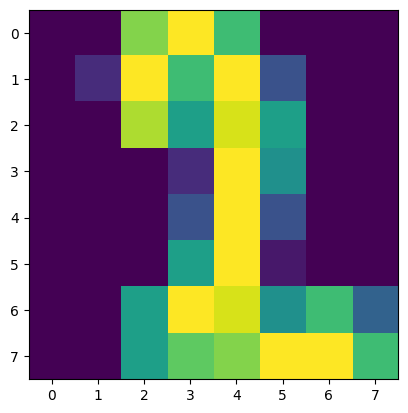

In [120]:
import random

i = random.randint(0,1797)

plt.imshow(data.data[i].reshape((8,8)))

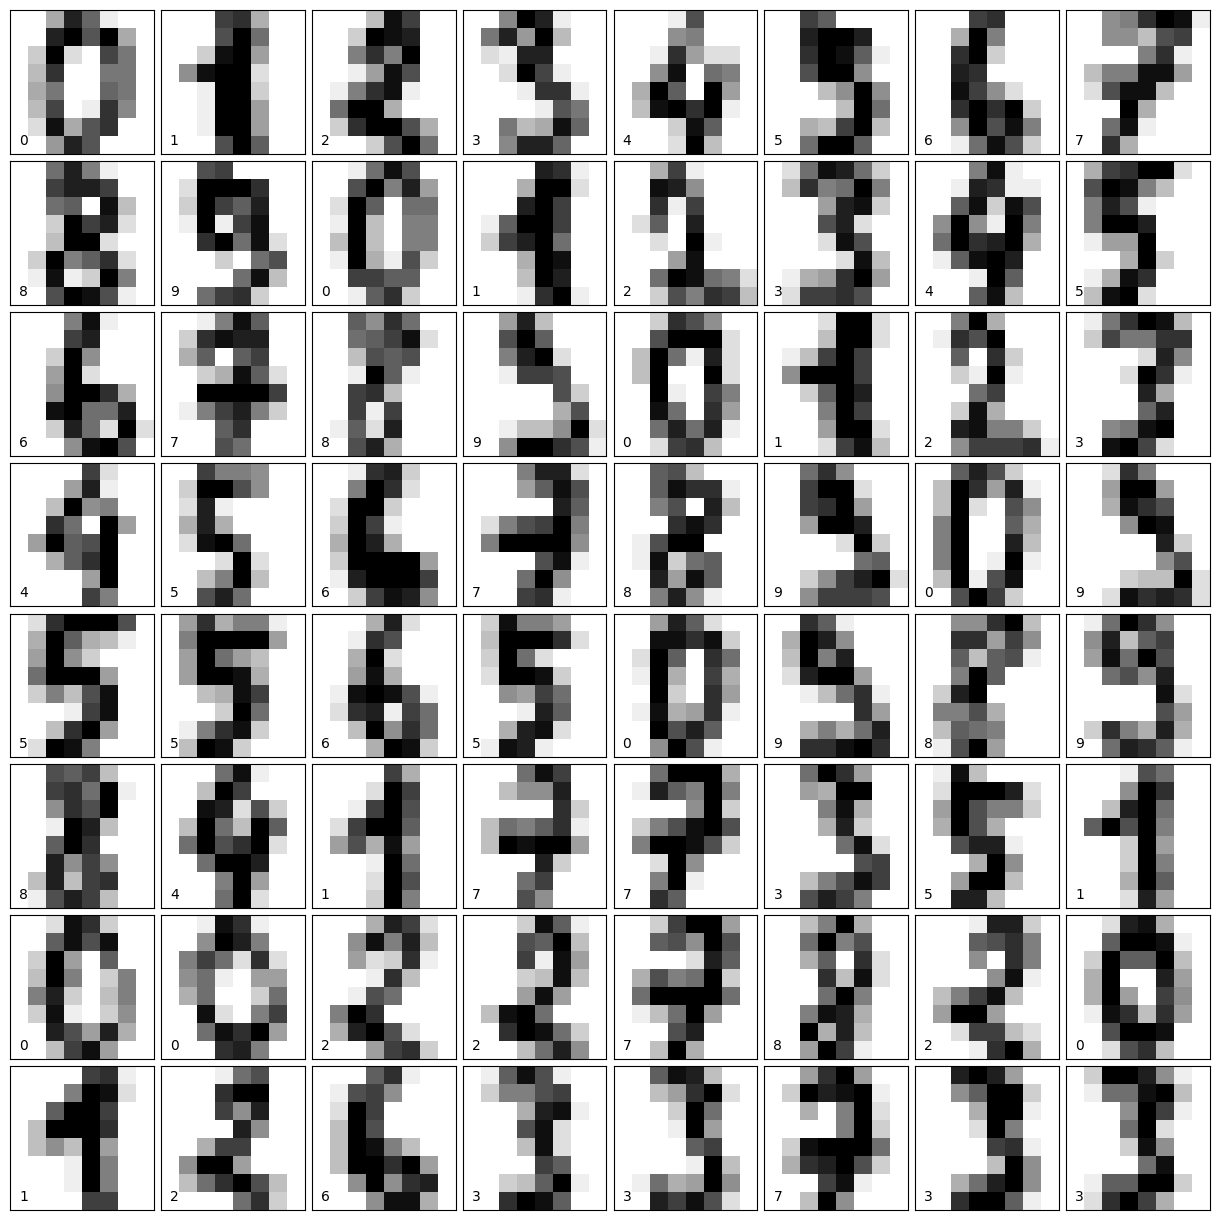

In [121]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left = 0, right = 1 , bottom = 0 , top = 1, hspace= 0.05 , wspace = 0.05)

for i in range(64):
  ax = fig.add_subplot(8,8,i+1 , xticks = [] , yticks = [])
  ax.imshow(data.images[i],cmap=plt.cm.binary , interpolation='nearest')
  ax.text(0,7,str(data.target[i]))

In [122]:
from sklearn.model_selection import train_test_split


x = df.drop('target',axis=1)

x = np.array(x)

y = df.target

y = np.array(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [123]:
x_train = (x_train/255).reshape(-1,8,8,1)
x_test = (x_test/255).reshape(-1,8,8,1)

In [124]:
import keras

In [125]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [143]:
model = Sequential()

In [144]:
model.add(Conv2D(64,1,1,input_shape=(8,8,1),activation = 'relu'))

In [145]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [146]:
model.add(Flatten())

In [147]:
model.add(Dense(10,activation='relu'))

In [148]:
model.add(Dense(10,activation='softmax'))

In [149]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [150]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1091 - loss: 2.3004 - val_accuracy: 0.1361 - val_loss: 2.2936
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1134 - loss: 2.2924 - val_accuracy: 0.2889 - val_loss: 2.2782
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2749 - loss: 2.2735 - val_accuracy: 0.2556 - val_loss: 2.2529
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2788 - loss: 2.2436 - val_accuracy: 0.4000 - val_loss: 2.2057
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3755 - loss: 2.1924 - val_accuracy: 0.4111 - val_loss: 2.1416
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3877 - loss: 2.1349 - val_accuracy: 0.4444 - val_loss: 2.0569
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4336 - loss: 2.0443 - val_accuracy: 0.4806 - val_loss: 1.9594
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4679 - loss: 1.9372 - val_accuracy: 0.5056 - val_loss

In [151]:
model.evaluate(x_test,y_test)[1]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8130 - loss: 0.5518 


0.7805555462837219

In [159]:
pred = model.predict(x_test)

pred = pred.argmax(axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


<Axes: >

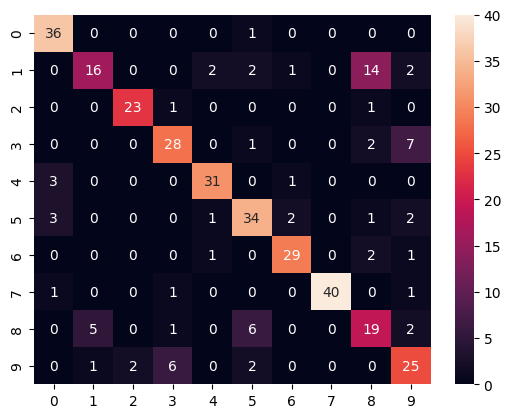

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

co = confusion_matrix(y_test,pred)
sns.heatmap(co,annot=True)

In [171]:
from sklearn.ensemble import RandomForestClassifier

ro = RandomForestClassifier()

ro.fit(x_train.reshape(x_train.shape[0],-1),y_train)

pop = ro.predict(x_test.reshape(x_test.shape[0],-1))

In [172]:
x_train.shape[0]

1437

In [173]:
x_test.shape[0]

360

<Axes: >

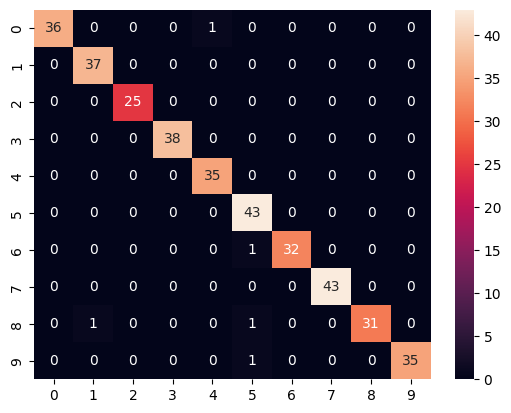

In [174]:
con = confusion_matrix(y_test,pop)
sns.heatmap(con,annot=True)

In [175]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pop))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        38
           4       0.97      1.00      0.99        35
           5       0.93      1.00      0.97        43
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        43
           8       1.00      0.94      0.97        33
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

